# Import and Preview Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pixar_movies = pd.read_csv('PixarMovies.csv')

num_rows = pixar_movies.shape[0]
num_cols = pixar_movies.shape[1]
print ('Number of Rows:', num_rows)
print ('Number of Columns:', num_cols)

Number of Rows: 15
Number of Columns: 16


In [2]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0


In [3]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

# Data Cleaning

In [4]:
#Remove % from Domestic% and International% Columns
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.replace('%', '').astype('float')
pixar_movies['International %'] = pixar_movies['International %'].str.replace('%', '').astype('float')


In [5]:
import warnings 

#Replace NaN values in Oscar columns with 0
pixar_movies['Oscars Nominated'].fillna(0, inplace = True)
pixar_movies['Oscars Won'].fillna(0, inplace = True)

pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,43.252667,56.748667,133.400000,2.666667,0.733333
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,6.638585,6.636984,59.696614,2.093072,0.798809
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,33.090000,47.020000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,38.480000,50.660000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,42.930000,57.070000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,49.340000,61.520000,182.500000,4.500000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,52.980000,66.910000,200.000000,6.000000,2.000000


In [6]:
#mutiply IMDB column by 10 to normalize with other ratings
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] *10

In [7]:
#Create seperate data set without "Inside Out"
filtered_pixar = pixar_movies [0:14]

In [8]:
filtered_pixar.head(14)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
1,1998,A Bug's Life,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
4,2003,Finding Nemo,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
5,2004,The Incredibles,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
6,2006,Cars,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
7,2007,Ratatouille,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
8,2008,WALL-E,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0
9,2009,Up,96,98,83.0,88,68.11,731.3,293.0,318.90,438.3,40.07,59.93,175,5.0,2.0


In [9]:
pixar_movies = pixar_movies.set_index(pixar_movies['Movie'])
filtered_pixar = filtered_pixar.set_index(filtered_pixar['Movie'])

# Plot: Pixar Critic Reviews Over Time

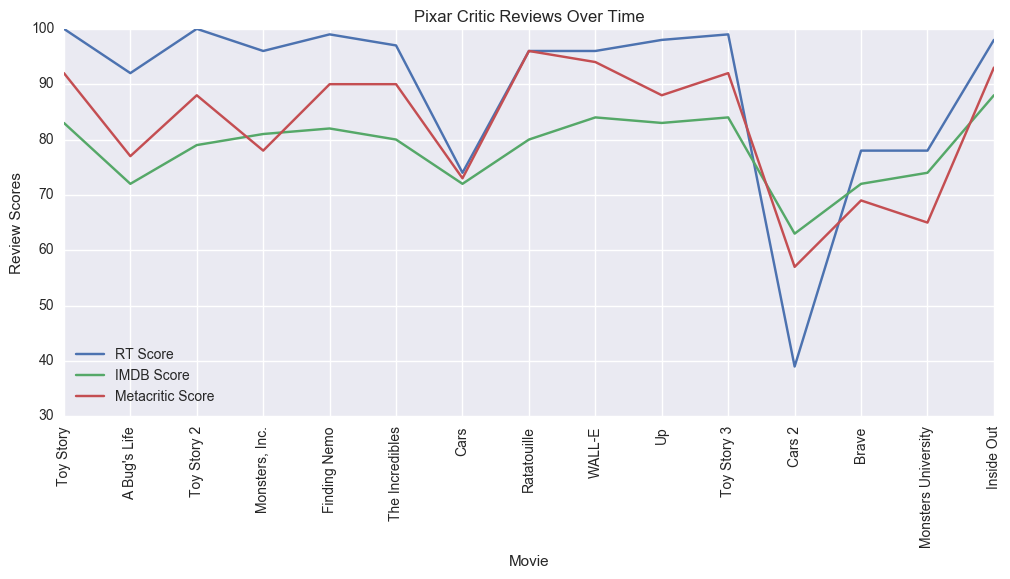

In [10]:
#Pixar Critic Reviews over TIme
critics_reviews = pixar_movies[['RT Score','IMDB Score', 'Metacritic Score']]
critics_reviews.plot( figsize = (12,5))
plt.title('Pixar Critic Reviews Over Time')
plt.xticks(range(0,critics_reviews.shape[0]), critics_reviews.index, rotation = 90)
plt.ylabel('Review Scores')
plt.show()

Initial Analysis: Overall impressive review scores. Two drops in performance occur around the release of Cars and Cars2-Monster University, with high performers quickly following afterwards. Toy Story appears to be the best performing brand, while Cars is the worst performer. 

Future Work: Why did Cars2 score far less than Cars? I would have expected Pixar to have learned from previous experience. What went wrong with Brave and Monster's University? How does critic ratings correlate to earnings? How did 3D cinema affect ratings and earnings?

# Boxplot of Critic Reviews

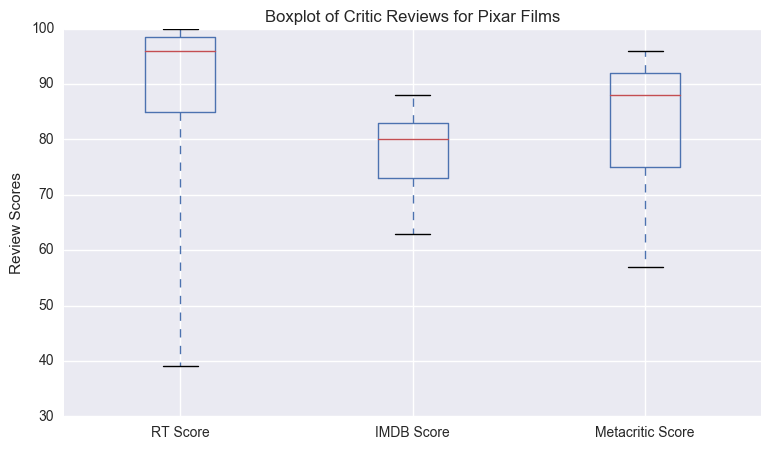

In [11]:
critics_reviews.plot(kind = 'box', figsize = (9,5), whis = 1000)
plt.title('Boxplot of Critic Reviews for Pixar Films')
plt.ylabel('Review Scores')
plt.show()

Initial Analysis: From highest to least range we have RT, Metacritic then IMDB. Reviews are skewed towards the higher end.  

Future Analysis: How do Pixar boxplots compare to the average movie boxplot of each critic? Overlaying quartiles with previous critic score plot may provide additional insight. 

# International vs Domestic Revenue

(0, 100)

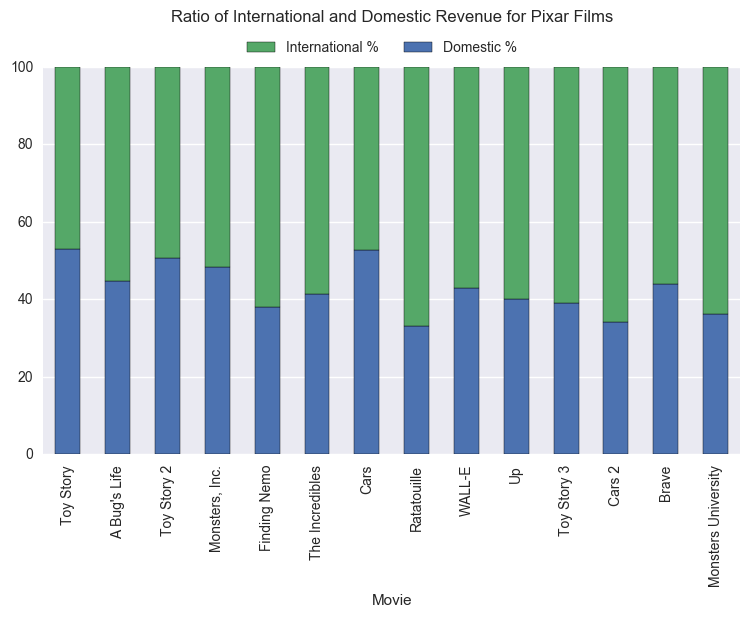

In [12]:
revenue_proportions = filtered_pixar[['Domestic %', 'International %']]
revenue_proportions.plot(kind = 'bar', stacked = True, figsize = (9,5))
plt.title('Ratio of International and Domestic Revenue for Pixar Films', y = 1.1)
plt.legend(bbox_to_anchor=(0.5,1.1), mode = 'expand', ncol = 2)
plt.ylim([0,100])


Initial Analysis: In most cases, international revenue is the majority for Pixar films. 

Future Analysis: Plot actual revenue (not percentage) share between international and domestic. 